# Анализ игровой индустрии. Сборный проект

**Контекст работы:**

Для анализа имеем данные о продажах из интернет магазина "Стримчик" - ретейлера компьютерных игр для пользователей со всего мира. Основной задачей является опредление точек для успешной работы интернет сервиса в будующем году, т.к. имеем исторические данные только до 2016 года, будем считать будующим 2017й год, а полученную концепцию работы сможем применить, если данные обновятся или же для аналогичных задач.

**Цель работы:**

1. Выявление определяющих успешность игры закономерностей.
2. Исследование изменения колличества выпускаемых игр с периодом времени.
3. Выявление платформ с наибольшими сумарными продажами.
4. Опредление актуального переиода в данных для развития на 2017 год.
5. Выделение потенциально прибылиных платформ.
6. Формулировка выводов о влиянии отзывов на продажи.
7. Описание того как влияет жанр игры на прибыльность.
8. Составление портрета пользователя каждого региона.
9. Проверка двух гипотез:
    * средние пользовательские рейтинги платформ Xbox One и PC одинаковы,
    * средние пользовательские рейтинги жанров Action и Sports разные
   
**Ход работы:**
1. Обзор данных.
1. Предобработка и подготовка данных.
2. Исследовательский анализ данных.
3. Составление партрета пользователя.
4. Проверка гипотез.
5. Подведение итогов работы.

## Обзор данных

Импортируем библиотеки которые, будем применять в работе:

In [1]:
#для создания таблицы с пропусками
import numpy as np
#для работы с таблицами
import pandas as pd
#для работы с математическими функциями
import matplotlib.pyplot as plt
#для создания графиков
import seaborn as sns
#отключение предупреждений в Юпитере
import warnings
warnings.filterwarnings('ignore') 
#для разичных путей открытия файла
import os
#для провередение статистических тестов
from scipy import stats as st

Откроем файл с данным и изучем его:

In [2]:
#созадим переменные с путями к файлу
way1 = 'games.csv'
way2 = '/folder_2/games.csv'
#напишем условие для открытия и сообщение об ошибке
if os.path.exists(way1):
    games_df = pd.read_csv(way1)
elif os.path.exists(way2):
    games_df = pd.read_csv(way2)
else:
    print('Путь к файлу не найден, проверьте переменные way1, way2!')
#изучим информацию о таблице  
games_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Соотнесем название колонок с тех. описанием:
* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Посмотрим на отображение таблицы и на случайную выборку строк из нее:

In [3]:
#перемешаем строки методом sample, выведем 10 из них
games_df.sample(frac=0.5).head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14430,Nishijin Pachinko Monogatari 2,SNES,1996.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
12656,FIFA Soccer 07,DS,2006.0,Sports,0.05,0.01,0.00,0.00,NaN,NaN,NaN
6980,The Club,PS3,2008.0,Shooter,0.14,0.07,0.00,0.03,72.0,6.5,M
8350,Hellboy: The Science of Evil,PS3,2008.0,Action,0.13,0.02,0.00,0.02,47.0,6.1,T
4805,18 Wheeler: American Pro Trucker,PS2,2001.0,Racing,0.20,0.15,0.00,0.05,61.0,5.7,E
7100,Buzz! Junior: RoboJam,PS2,2007.0,Misc,0.11,0.09,0.00,0.03,NaN,NaN,NaN
7896,Nobunaga no Yabou: Souzou,PS3,2013.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
9434,Wantame Music Channel: Doko Demo Style,DS,2007.0,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
8449,TOEIC Test Training DS,DS,2007.0,Misc,0.00,0.00,0.17,0.00,NaN,NaN,NaN
13316,Pachitte Chonmage Tatsujin 15: Pachinko Fuyu n...,PS2,2008.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN


**Вывод по разделу:**
1. Название столбцов в таблице записано с нарушением стиля.
2. Используется некорректные типы данных для столбцов `Year_of_Release`, `Critic_Score`, `User_Score` 
3. В большинстве столбцов есть пропуски в данных

## Предобработка и подготовка данных

### Замена названия столбцов

In [4]:
#приведем все столбцы к нижнему регистру
games_df.columns = games_df.columns.str.lower()
#выведем названия столбцлов
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games_df.sample(frac=0.5).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1064,WCW/NWO Thunder,PS,1998.0,Fighting,1.10,0.48,0.04,0.07,NaN,NaN,NaN
14806,1000 Cooking Recipes from ELLE à table,DS,2010.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN
368,Rugrats in Paris: The Movie,PS,2000.0,Action,1.96,1.33,0.00,0.23,NaN,NaN,NaN
4970,SD Gundam G Generation Spirits,PS2,2007.0,Strategy,0.00,0.00,0.38,0.00,NaN,NaN,NaN
6413,Summer Athletics: The Ultimate Challenge (US s...,Wii,2008.0,Sports,0.23,0.03,0.00,0.00,NaN,NaN,NaN
8378,Camp Rock: The Final Jam,DS,2010.0,Misc,0.14,0.02,0.00,0.01,NaN,NaN,NaN
4681,Battlefield: Hardline,PS3,2015.0,Shooter,0.13,0.15,0.07,0.06,NaN,5.3,M
14639,OZMAFIA!! -vivace-,PSV,2015.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
4142,Gauntlet Legends,PS,2000.0,Action,0.26,0.18,0.00,0.03,NaN,NaN,NaN


### Обработка пропусков

Перед заменой типов данных обработаем пропуски в таблице:

In [6]:
# объявим функцию, которая ищет явные пропуски, как None и Nan и невянвые, в виде пробелов
def nan_values(df,list_nans=['', ' ', '""', '" "', None, np.nan]):
    list_count=[]
    list_share=[]
# цикл, который считает сумму и процент пропусков
    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(round(sum(df[col].isin(list_nans)) * 100 / len(df), 2))
# создадим датафрейм с пропусками        
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': list_count,
                                     'percent_missing': list_share})
    return missing_value_df

Выведем получившуюся таблицу на экран:

In [7]:
missing_columns = nan_values(games_df)
#уберем колонки без пропусков
display(missing_columns[missing_columns['num_missing']>0]) 
#посчитаем колличство столбцов с пропусками
print('Столбцов с пропусками:', missing_columns[missing_columns['num_missing']>0].shape[0]) 

,column_name,num_missing,percent_missing
0,name,2,0.01
2,year_of_release,269,1.61
3,genre,2,0.01
8,critic_score,8578,51.32
9,user_score,6701,40.09
10,rating,6766,40.48


Столбцов с пропусками: 6


**name**,  **genre** - 2 пропуска

В столбцах одинаковое колличество пропусков, выведем на экран эти строки:

In [8]:
# сделаем срез по строкам с пропусками для двух столбцов
games_df.loc[games_df['name'].isna() & (games_df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что строки совпадают и остальны данные практически отствуют, можем спойно их удалить без ущерба для общего предствления о данных:

In [9]:
#удалим пропуски из одного столбца, т.к. они совпадают
games_df = games_df.dropna(subset=['name'])
#проверим на пропуски
print(len(games_df[games_df['name'].isna()])+len(games_df[games_df['genre'].isna()]))  

0


Для дальнейшей обработки изучим таблицу более детально. Посмотрим есть ли в ней одинаковые игры, очевидно, что одну и туже игру могли выпускать на нескольких платформах. Проверим как много таких игр: 

In [10]:
print('Одинаковых игр в датафрейме:', games_df.duplicated(subset='name').sum())

Одинаковых игр в датафрейме: 5154


Посмотрим самые популярные игры, выпускающиеся на нескольких платформах:

In [11]:
games_df['name'].value_counts().head()

Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Madden NFL 07                   9
Name: name, dtype: int64

Изучим такие игры на примере самой перевыпускаемой игры Need for Speed: Most Wanted 

In [12]:
#сделаем срез по данным из игры
games_df.loc[games_df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Итак, мы видим следующее:
* игра может выпускаться на нескольких платформах
* игра может перевыпускаться на одной и той же платформе
* оценки критиков и пользователей розняться не сильно

Таким образом, для обработки пропусков мы можем использовать дубликаты по названию игры, заменяя их на среднее значение, а вот оставшееся значения, мы не сможем обработать средним, например, по жанру, т.к. сильно исказим представление о данных

**year_of_release** - пропущено менее 2 процентов значений.

Пропусков не много, такое маленькое колличество не повлияет на результаты дальнейшего исследования, просто удалим их:

In [13]:
#удалим пропуски
games_df = games_df.dropna(subset=['year_of_release']) 
#проверим удалились ли пропуски
print(len(games_df[games_df['year_of_release'].isna()]))  

0


Итак, почти половину пропусков нам удалось устранить по названию, остаётся менее 1го процента пропущенных значений, такое колличество не повлияет, на дальнейшее исследование и преставление о данных, просто удалим их:

**critic_score** - пропущено более 50% 

Столбец показываетт оценку критиков и будет полезен в дальнейшем исследовании, оценку криткиов мы не сможем восстановить по имеющимся данным, для того что бы не потерять более половины данных удалением, заменим на "-1", отрицательное значение не должно сожержаться в данном столбце, проверим это и произведем замену:

In [14]:
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Отлично, отрицательного значения нет, выполним замену:

In [15]:
#оставшиеся пропуски заменим на ноль
games_df['critic_score'] = games_df['critic_score'].fillna(-1)
print('Пропусков после замены на ноль:', games_df['critic_score'].isna().sum()) 

Пропусков после замены на ноль: 0


**user_score** - пропущено около 40 %

Этот столбец по своей специфике схож с предыдущим, только показывает оценку пользователей, он также будет важен для дальнейшего исследования.
Во время обзора семпла данных было замечено не числовое значение в этом столбце - tbd 

**TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). 

Оценка от пользователей обычно формируется из среднего значения. Не опредлеенная оценка, означает, что игру оценило недостаточное колличество человек, что бы поставить оценку объективно. В нашем случае **"tbd"** это такой же пропуск, как и NaN, ведь оценки нет, поэтом принцип обработки будет такой же как и у сталбца `critic_score`:

In [16]:
# заменим значения TBD на NAN методом replace
games_df['user_score'] = games_df['user_score'].replace('tbd', np.NaN)
# games_df['user_score'] = games_df['user_score'].astype('float')

In [17]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Перед началой замены убедимся, что нет строк с отрицательной оценкой пользователей:

In [18]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Остальные пропуски заменим по аналогии с `ctitic_score`

In [19]:
#заполним пропуски заглушкой:
games_df['user_score'] = games_df['user_score'].fillna(-1)

print('Пропусков после замены:', games_df['user_score'].isna().sum()) 

Пропусков после замены: 0


**rating** - пропущено окколо 40% 

Данные в этом столбце являются категориональными и могут быть заменены, только на точное значение. Играм в таблице присвоен рейтинг ESRB. Уточним подробнее, что это за рейтинг:

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. [источник](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board "википедия")

В наших данных хранятся данные об их играх, которые производится не только для пользователей США, а в других странах такая маркировка будет не обязательна, попробуем восстановить часть данных, на основе дубликатов одинаковых игр, но выпущеных для разных платформ, а всё остальное заменим на NOT ESRB 

In [20]:
#выведем на экран колличество пропусков до поиска замены по названию
print('Пропусков до замены по названию игры:', games_df['rating'].isna().sum()) 
#восстановим часть пропусков по названию
games_df.loc[games_df['rating'].isna(), 'rating'] = games_df.groupby('name')['rating'].transform('first')  
#посмотрим сколько пропусков осталось 
print('Пропусков до замены по названию игры:', games_df['rating'].isna().sum()) 
#выполним замену 
games_df['rating'] = games_df['rating'].fillna('NOT ESRB')
#проверим на пропуски
print('Пропусков после всех замен:', games_df['rating'].isna().sum())

Пропусков до замены по названию игры: 6676
Пропусков до замены по названию игры: 6259
Пропусков после всех замен: 0


Посмотрим, остались ли в таблице пропуске:

In [21]:
games_df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски обработаны, приступим, к замене типов данных

### Замена типов данных и проверка на дубликаты

Заменим данные на нужный нам тип.

* `year_of_release` - достаточно будет перевести в целочисленное значение, т.к. у нас есть информация только о годе
* `critic_score` т.к. оценка от 1 до 100, знаки после запятой нам не нужны

In [22]:
#добавим в словерь данные, которые требуется изменить
games_df = games_df.astype({'year_of_release': 'int', 
                            'critic_score': 'int',
                             'user_score': 'float'},
                             errors='ignore')

#выведем для проверки типы данных
games_df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int32
user_score         float64
rating              object
dtype: object

Типы данных изменены, проверим на явные дубликаты:

In [23]:
#созадим переменную с колличеством дубликатов
#создадим два условия, при котором удаляются дубликаты и вывод информации о дубликатах
dup_sum = games_df.duplicated().sum()
if dup_sum > 0:
    print(f'Дубликатов было: {dup_sum}. Дубликаты удалены')
    data = games_df.drop_duplicates()
else: 
    print('Дубликатов нет')

Дубликатов нет


В столбцах `platform` и `genre` могут содерааться неявные дубликаты, просмотрим и устраним их если потребуется:

In [24]:
print('Значения в "platform":')
print(games_df['platform'].unique())
print('Значения в "genre":')
print(games_df['genre'].unique())

Значения в "platform":
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Значения в "genre":
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Неявных дубликатов не обнаружено, приступим к добавлению расчетов в таблицу:

### Подсчет суммарных продаж

Для исследования важно иметь представление об общих продажах, поэтому подсчитаем суммарные продажи и добавим результат в таблицу.

Столбец назовем `ww_sales` ww- сокр. от англ. worldwide (всемирный)

In [25]:
#методом инсерт добавим столбец в таблицу рядом с всеми остальными продажами
#общие продажи подсчтаем сложив все
games_df.insert(8, 'ww_sales', games_df['na_sales']+games_df['eu_sales']+games_df['jp_sales']+games_df['other_sales'])

Выведе итоговую таблицу на экран:

In [26]:
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,ww_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,NOT ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,NOT ESRB
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,-1,-1.0,NOT ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,-1,-1.0,NOT ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,-1,-1.0,NOT ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,-1,-1.0,NOT ESRB


**Выводы по разделу:**

По итогом раздела были выполнены, следуюшие задачи:
* значения в таблице бьли приведены к общему стилю
* были обработаны пропуски и предоставлены гипотезы об их появлении
* отдельно были разобраны и обработы значения "TBD"
* данные приведены к нужному типу
* добавлены необходимы расчёты в таблицу

Таким образом, сформировали более широкое представление о данных, а таблица была подготовлена к исследовательскому анализу

## Исследовательский анализ данных

### Обзор колличества выпускаемых игр за разные периоды

Что бы составить общее представление о развитии игрвой индустрии, посмотрим как менялось колличство выпускаемых игр в разные годы. Для построение графика будем брать самый первый выход игры и не включать выпуск на новую платформу или переиздани:

Text(0, 0.5, 'Новые игры')

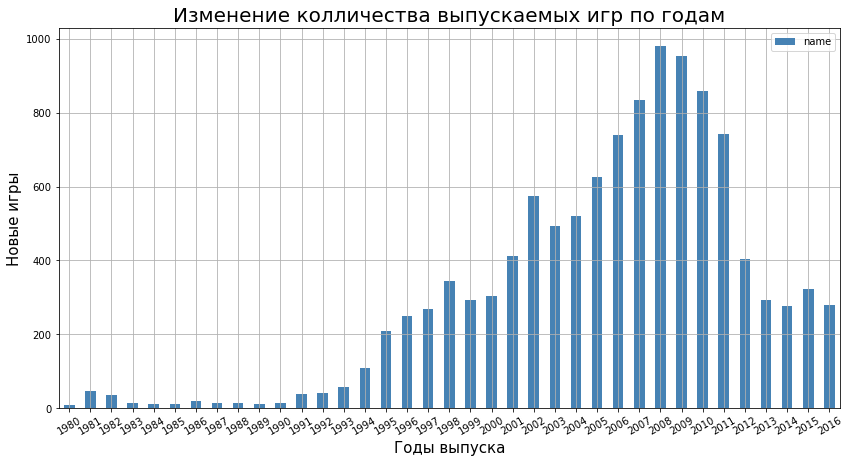

In [27]:
#создадим новый датафрейм, отсортируем по убыванию года, удалим дубликаты, оставив только первое значение
unique_games_df = games_df.sort_values(by='year_of_release').drop_duplicates(subset='name', keep='first')
#создадим сводную таблицу, по ней построим столбчатую диаграмму
unique_games_df.pivot_table(index='year_of_release', values='name', aggfunc='count').\
                plot(kind='bar',
                figsize=(14,7),
                color='steelblue',
                grid=True,
                rot=30)
plt.title("Изменение колличества выпускаемых игр по годам", fontsize=20)
plt.xlabel("Годы выпуска", fontsize=15)
plt.ylabel("Новые игры", fontsize=15)

На графике можем проследить следующее:
* продуктивное начало игровой индустрии 1995 год, более 200 выпущенных игр
* с 1995 года идёт стремительный, но прерывистый рост по выпускаемым играм
* больше всего новых игр было выпущено в 2008 году, около 1000
* после 2008 года идёт плавное снижение продуктивности
* в 2012 году, резкое снижение, до уровня 2001 года

Подведем итог: с развитием информационных технологий создание игр имело резкую популярность, но достигнув определлного уровня  новые игры стали выпускаться в меньшем колличестве. Это далеко не означает "падении" индустрии, возможно это происходит, потому что игровые компании стали вкладывать больше времени в производство качественного и уникального продукта, что бы удвлетворить запросы потребителей со всего света.

### Обзор изменения продаж по платформам

Игровая индустрия предлагает множество платформ под любые запросы: от портативных гаджетов, до домашних приставок, способных полностью погрузить геймеров в виртуальный мир. Посмотрим платформы с наибольшей выручкой:

In [28]:
#создадим сводную таблицу, отсортируем в порядке убывания, выведем первые пять строк
games_df.pivot_table(index='platform', values='ww_sales', aggfunc='sum').sort_values(by='ww_sales', ascending=False).head(10)

,ww_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим, что в лидерах, чаще всего встречается платформа PS или PlayStation от компании Sony различных поколений. Также выделятся прямой кункуретн PS - приставка X360 или Xbox360 от  Microsoft. Wii - домашняя консоль от компании Nintendo и портатипная консоль DS от того же производителя. 

Посмотрим как ведут себя продажи, напишем функцию для построения нескольких графиков:

In [29]:
#объявим функцию для построения графиков изменения продаж
#функция принимает дадасет с данными по которыми нужно построить и название графика
#в теле функции построение графика и его параметры
def top_platform(df, title):
    sns.set_theme(style="whitegrid")
    sns.relplot(data=df,
            x='year_of_release', y='ww_sales', 
            kind='line', hue='platform', 
            ci=None, size='platform', aspect=1.5)
    plt.title(title, fontsize=20)
    plt.show()

Возьмём по 2 поколения от каждой приставки и посмотрим как ведут себя продажи:
* Playstation - PS2, PS3
* Xbox - XB, X360
* Nintendo Wii - Wii, WiiU
* Nintendo DS - DS, 3DS

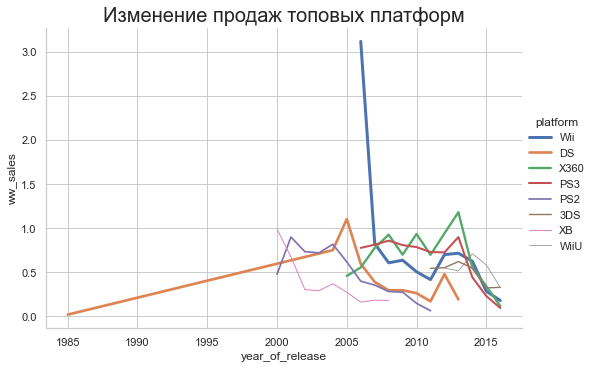

In [30]:
top_platform(games_df.query('platform in ("PS2", "PS3", "XB", "X360", "Wii", "WiiU", "DS", "3DS")'), 'Изменение продаж топовых платформ')  

На графике видим неправдопобный линейный рост/падение у платформ DS, PS, Wii, XB вероятнее всего некоторые строки записаны с ошибочной датой релиза, проверим на платформе DS: 

Уточним [дату выхода](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board "википедия") платформы в интернете:

Она вышла только в 2004 году, в данных точно ошибка, проверим сколько таких игр:

In [31]:
games_df.loc[(games_df['year_of_release'] < 2004) & (games_df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,ww_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,-1,-1.0,NOT ESRB


In [32]:
games_df = games_df.loc[~((games_df['year_of_release'] < 2004) & (games_df['platform'] == 'DS'))]

Всего 1 игра, удалим её:

In [33]:
games_df = games_df.loc[~((games_df['year_of_release'] < 2004) & (games_df['platform'] == 'DS'))]

Удалим все линейные росты и падения с начала и конца периода существования платформы, опираясь на данные с графика:

In [34]:
#объявим фунции для удаления строк с ошибкой в дате релиза
#функция принимает год релиза и соответсвующую платформу
#drop_wrong_year1 удаляет из датафремы игры с датой релизой до опредленного года
#drop_wrong_year2 удаляет из датафремы игры с датой релизой после опредленного года
def drop_wrong_year1(year, platfom):
    global games_df
    games_df = games_df.loc[~((games_df['year_of_release'] < year) & (games_df['platform'] == platfom))]
def drop_wrong_year2(year, platfom):
    global games_df
    games_df = games_df.loc[~((games_df['year_of_release'] > year) & (games_df['platform'] == platfom))] 

Применим функцию:

In [35]:
#подставим в функции соответсвующие значения
drop_wrong_year1(2007, 'Wii')
drop_wrong_year1(2002, 'PS2')
drop_wrong_year1(2002, 'XB')
drop_wrong_year1(2005, 'DS') 
drop_wrong_year2(2011, 'DS')  

Убдедмся, в том, что функция сработала корректна на графике:

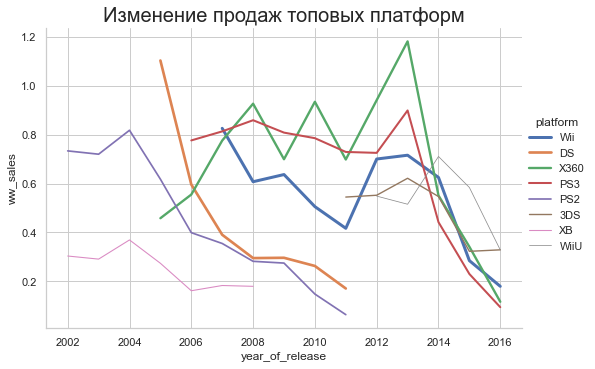

In [36]:
top_platform(games_df.query('platform in ("PS2", "PS3", "XB", "X360", "Wii", "WiiU", "DS", "3DS")'), 'Изменение продаж топовых платформ')  

Итак, датафрем был почищен от анамальных значений, изучим подробнее график:
* самые успешные платформы были выпущены после 2002 года
* самая нестабильная платформа X360, у неё есть много резких скачков и падений в период с 2005 по 2013 год, также это идинственная платформа начавшая проджи с роста
* все платформы имеют тенденцию к паднию продажи с течением времени
* график продаж после 2013 года у всех платформ практически одинаковый: стремительное падение
* можем просдледить период смен платформы на другое поколение, например:
    * на смену PS2 пришла PS3 через 4 года, после этого PS2 полностью утратила свою актуальность за 6 лет
    * на смену XBOX 1го поколения приешл X360 через 3 года, после чего 1е поколение приставки полностью утратило актуальность за 2 года
    * на смену Wii пришёл WiiU через 5 лет
    * на смену DS пришла 3DS через 6 лет
    
Таким образом период "жизни платформы" будет примерно 5 лет, через это время выходит новое поколение, а старое начинает стремительнее терять в продажа до полного ухода с рынка
   

###  Опредление актуального периада

На основе постреонных графиков, выделим, актуальный период, нам интересно увидеть как идут продажи у различных платформ на максимально близком отерезке, это период с 2014 по 2016 годы:
* здесь будет много новых платформ
* график поведения продаж на этом отрезке начинает вести себя нормально

Создадим новый датафрейм, `act_games_df` - act сокр. от actual:

In [37]:
#сделаем срез методом query для игр выпущенных в 2011 году или после 
act_games_df = games_df.query('year_of_release >= 2014')
games_df.sample(frac=0.5).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,ww_sales,critic_score,user_score,rating
522,Medal of Honor,PS3,2010,Shooter,1.28,1.04,0.07,0.42,2.81,75,7.5,M
11301,BlazBlue Central Fiction,PS4,2016,Fighting,0.04,0.00,0.03,0.01,0.08,85,7.6,T
3309,Tomb Raider (2013),XOne,2014,Action,0.35,0.21,0.00,0.05,0.61,-1,-1.0,NOT ESRB
7625,The BIGS 2,PS2,2009,Sports,0.10,0.08,0.00,0.03,0.21,-1,-1.0,E10+
14406,Exstetra,PSV,2013,Role-Playing,0.00,0.00,0.03,0.00,0.03,-1,-1.0,NOT ESRB


### Опредление потнциально прибыльных платформ

Узнаем какие платформы актульны на момент с 2013 года и опредлим лидеров по продажам:

In [38]:
#cоздадим сводную таблицу, отсоритруем в порядке убывания
act_games_df.pivot_table(index='platform', values='ww_sales', aggfunc='sum').sort_values(by='ww_sales', ascending=False)

,ww_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Итак, в лидерах по прадажам за акутальный период:
1. PS4 - 288 млн
2. XOne - 140 млн
3. 3DS - 86 млн

Видим, что на смену старым платформам пришли платформы нового поколения, построим график и изучим измения в продажах

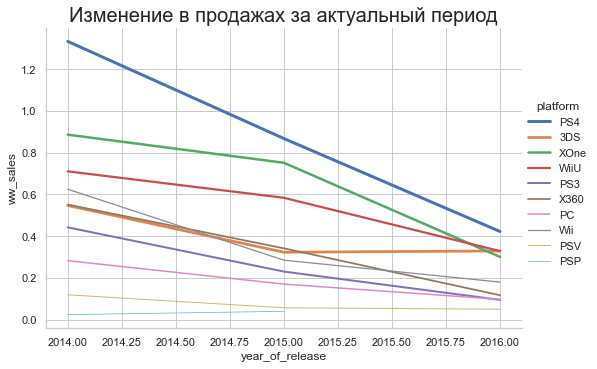

In [39]:
#построим график с помошю функции
top_platform(act_games_df, 'Изменение в продажах за актуальный период')  

Видим, что продажи у всех консолей стимяться вниз, это закономерно, ведь, начиная с 2011 года игр стало выпускаться меньше. Поэтому из имеющихся консолей, выделим самые перспективные по признаку, чем новее консоль, тем больше потенцальная прибыльность: 
* В начале 2013 года вышли 2 новые консоли PS4 и XOne - это и будут потенцально прибыльные платформы, до момента выхода новых моделей
* приставка PSP полностю утратил актуальность к 2015 году

### Анализ значений диаграммы размаха для общих продаж по платформам

Построим диаграмму размаха, уберем из нее неактуальные платформы WiiU и PS2:

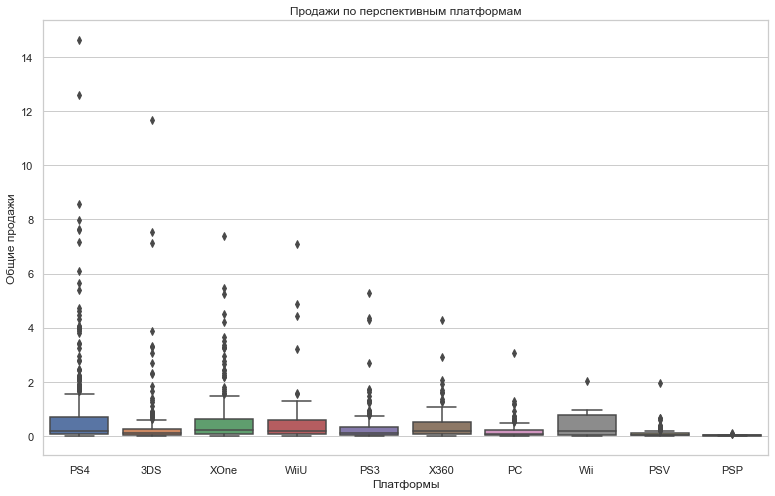

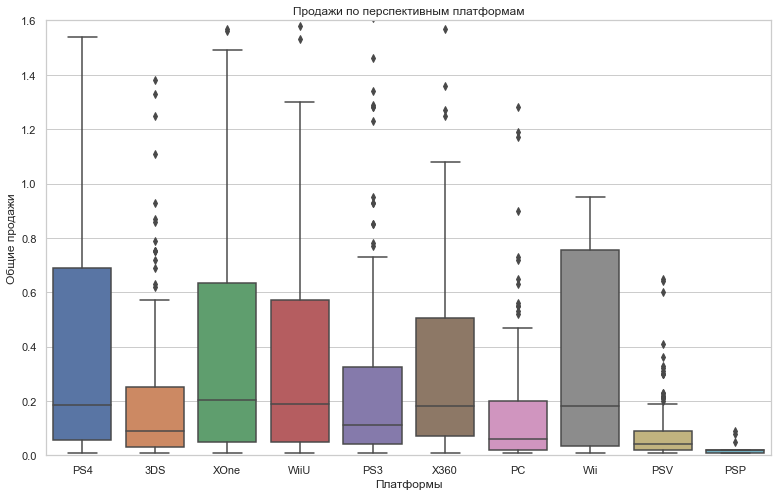

In [40]:
#построим "ящик с усами", зададим параметры, исключим не актуальные платформы 
data_temp, y = act_games_df, 'ww_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 1.6)))
plt.show()

На графиках видиим следующее:
* самые лучшие продажи очевидно оказались PS4 и XOne, нормальные значения у обоих в пределах 1,5 млн, но есть различия в медианах и выбросах, на PS4 много игр с нетепично выскоими продажами, что может нам говорить о лучшем потенциале, XOne чуть больше медиана продаж, что говорит нам о большей стабильности
* WiiU имеет очень хорошие и стабильные продажи для портативной консоли, минимум выбросов и мединой на равне с топовоыми домашними консолями
* 3DS, не смотя на то, что находится в ТОПе обищх продаж, имеет очень слабую выручку игры обычно собирают до 0,5 млн, что будет не плохо для остальных портативных консолей, но неконкурентноспособно с домашними, от PS, Xbox
* наконец PC имеет самые слабые продажи из всех платформ, такие продажи подтверждают мнение о том, что на компьютерах очень остро стоит проблема "пиратского" взлома игр, что позволяеют пользователям не плтить за них.
* платформы PS3 и X360 уже заметно отстают по продажам от новых поколений

Таким образом: из двух ранее выделенных потенцально успешных платформ выберем PS4, потенциал у неё чуть больше и она смогла быстрее вытяснять предыдущее поколение, у XOne тоже очень хорошие продажи, но вот Х360 еще чуть дольше сохранит своё место на рынке и будет отнимать часть её возможной прибыли.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для оценки влияния отзывов на продажу выберем платформу PS4, дата выпуска, который входит в актуальный период

In [41]:
#объявим функцию для построения графиков
#функция принимает значение платформы, оценки пользователя или криткиов, номера на оси коориднат
#внутри функции словарь для подставления заголовков
#создание графика по отфльтрованному датафрейму
#параметры графика
def scatter_plots(platfrom, score_by, ax):
    score_translete = {'user_score': 'оценок пользователей', 'critic_score': 'оценок критиков'} 
    sns.scatterplot(data=act_games_df.loc[(act_games_df['platform']== platfrom) & (act_games_df[score_by] >-1)],
                          x=score_by,
                          y="ww_sales",
                          s=80,
                          alpha=0.6,
                          ax=axes[ax]).\
    set(title= f'Зависимость продаж на {platfrom} от {score_translete[score_by]}')

Построим с помошью написанной функции:

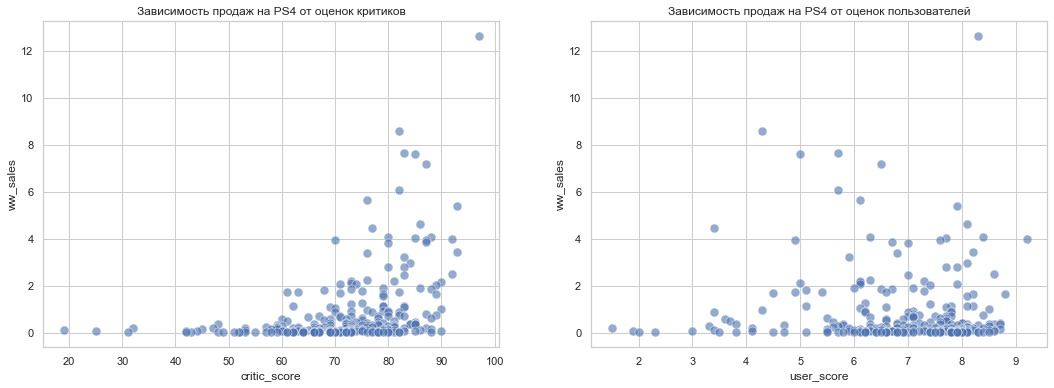

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18,6)) 
scatter_plots('PS4', 'critic_score', 0)
scatter_plots('PS4', 'user_score', 1)

Для оценки кртиков:
* до оценки в 60 баллов зависимость практически не прослеживается, но и игры здесь собирают меньше всего
* после оценки в 60 быллов видим положительно влияние на рост цены

Для оценки пользователей:
* большинство игр имеют оценку 5,5 баллов и выше
* зависимость не прослеживается, очень большой разброс

Напишем функцию для построение графика корреляции отзывов и продаж:

In [43]:
#обявим функциию для построения графиков
#функция принимает значение платформы, оценки пользователя или криткиов
#внутрии функции построение графиков и его параметры
def heatmap_plots(platfrom, score_by):
    sns.heatmap(data=act_games_df[['platform', 'ww_sales', 'critic_score', 'user_score']].loc[(act_games_df['platform']== platfrom) & (act_games_df[score_by] >-1)].corr(), 
            annot = True,
            cmap='BuGn').\
    set(title= f'Корееляция продаж и отзывов для {platfrom}')

Построим графика для PS4:

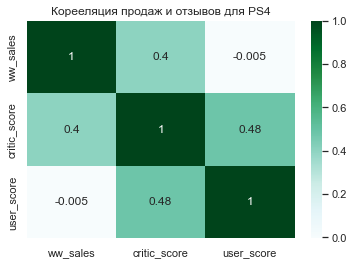

In [44]:
heatmap_plots('PS4', 'critic_score')

Интропретируем полученные значения:
* корееляция с оценкой критиков слабая и положительная
* c оценко пользователей отсутсвует

### Соотнесите выводы с продажами игр на других платформах

Построим как отзывы влияют на продажи внутри других платформ, для сравнения возьмём:
* XOne - главного конкурента PS4
* WiiU и его конкурента 3DS 
* PC - самую слабую по продажам платформу

Для **XOne:**

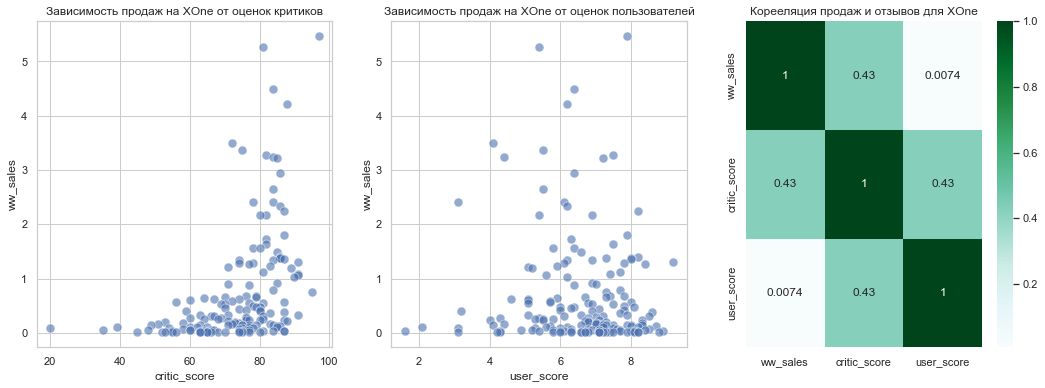

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18,6)) 
scatter_plots('XOne', 'critic_score', 0)
scatter_plots('XOne', 'user_score', 1)
heatmap_plots('XOne', 'critic_score')

Графики для XOne очень похожи с PS4, корялция с оценками кртиков не много больше, а вот с оценками пользователей, всё еще на значительная

Для **WiiU:**

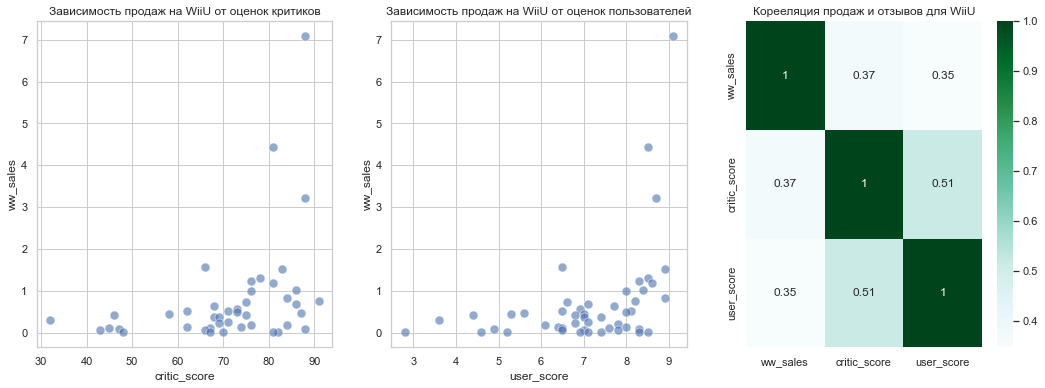

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18,6)) 
scatter_plots('WiiU', 'critic_score', 0)
scatter_plots('WiiU', 'user_score', 1)
heatmap_plots('WiiU', 'critic_score')

Видим, что выборка значений заметно ниже чем у предыдущих платформ, график с оценкой критков похож с предыдущими, а для оценок пользователей появилась прямая положительная корреляция

Для **3DS:**

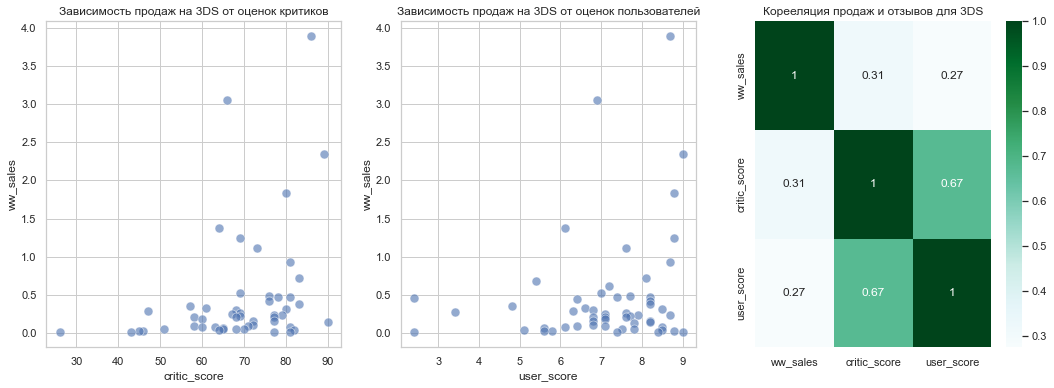

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18,6)) 
scatter_plots('3DS', 'critic_score', 0)
scatter_plots('3DS', 'user_score', 1)
heatmap_plots('3DS', 'critic_score')

Показатели схожи с платформой WiiU, на цену оказывает влияние как оценка критиковв, так и пользователей в примерно равной мер.

Посмотрим, что с оценками на уникальном в свом роде **PC:**

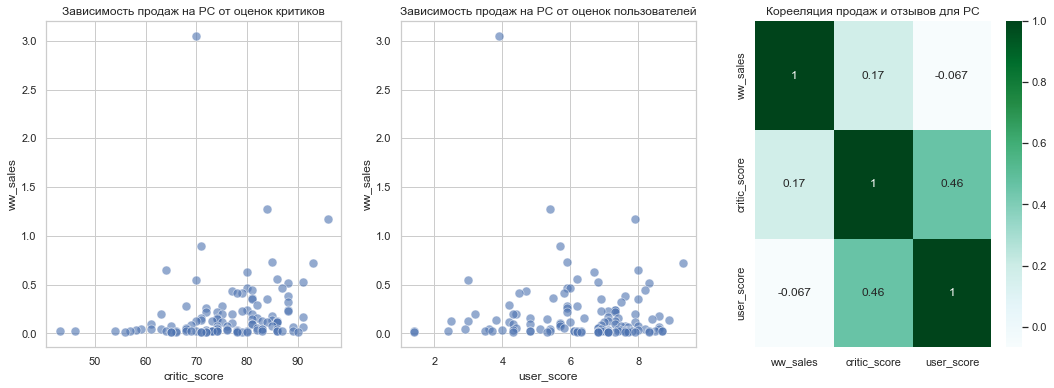

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18,6)) 
scatter_plots('PC', 'critic_score', 0)
scatter_plots('PC', 'user_score', 1)
heatmap_plots('PC', 'critic_score')

Для комьютерных игр корреляция с оценками кртиков самая слабая из всех платформ, а для оценок пользователей видим и вовсе отрицательное значение, получается, что чех хуже игра, тем больше она собирает? - конечно это не так. С системой оценок пользователей на PC, явно, что то не так, а значение -0.067 стоит интропретировать как отствие корреляции.

Подведём итог: 
* для всех платформ в большей мере оказывают влияние на стомость оценки от критиков. корреляция от слабой до умеренной
* для домашних платформ PS и Xbox, а также компьютерных игр отсутвует корреляция с оценками от пользователей
* на портативные консоли оценки пользователей оказывают положительное влияние. корреляция слабая

Опираясь на полученные выводы можем сказать, что показатели внутри платформы будут зависеть в большей части от её типа: стационарная/портативная/домашний ПК/ будь, то сами продажи или же показатели её корреляции от друих метрик.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Изучим продажи игр и их колличество по жанрам: 

In [49]:
#создадим таблицу с данными о сумму продаж, колличестве выпускаемых игр, среднем значении
top_genre = act_games_df.pivot_table(index='genre', values='ww_sales', aggfunc=['sum', 'count', 'mean'])
#переименум столбцы
top_genre.columns = ['sum', 'count', 'mean'] 
#отсортируем по убыванию общий суммы продаж 
top_genre = top_genre.sort_values(by='sum', ascending=False)
#выведем таблицу
top_genre

,sum,count,mean
genre,,,
Action,199.36,619,0.322068
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Role-Playing,101.44,221,0.459005
Misc,37.55,113,0.332301
Fighting,28.22,60,0.470333
Racing,27.52,69,0.398841
Platform,18.09,38,0.476053
Adventure,17.55,185,0.094865


1. Action - экшен/действие/боевик. Это самый продаваемый жанр(более 190 млн), эта цифра обусловлена тем, что игр в нём было выпущено в 3-4 раза больше чем в любом другом, всё потому что экшен имеет очень большие границы, в виде множества поджанров, а также широкую аудиотрию просто завлекает концепция постоянно происходящих действий, в которых они принимают непосредственное участие. 

2. Shooter - шутеры/стрелялки - На втором месте Шутеры, около 170 млн сумма продаж, а вот самих игр значительно меньше, чем в том в жанре экшен, значит игры выходят реже и имеют больший коммерческий успех 

3. Sports - спортивные игры. Игры имеют довольно хорошие продажи, более 100 млн, при том, что большинство из них уже было придумано до того, как была выпущена первая игровая консоль. 

4. Role-Playing	- ролевые игры/рпг. Не смотря на то, сумма продаж со спортивным жанром примерно одинакова, уступают тому же спорту по средней цене. Игр выпускается больше, а собирают они меньше

5. Misc - игры различного жанра. Игры, которые имеют такое обильное слияние жанров, что не попадают ни под одну категорию. Этот жанр можно отнести к топу из аутсайдеров, игры собирают менее 40 млн

Самые не прибыльные Стратегии и Головоломки, это не удивительно, ведь жанры довольно специфичные и расчитаны на узкую аудиторию, а многие из них просто протеворячат главное концепции видеоигр - заставляют думать, разбираться в механиках и т.п., вместо получения расслабления и удовльствия.

Оставим ТОП-10 жанров по продажам и выведем их на круговой диаграмме:

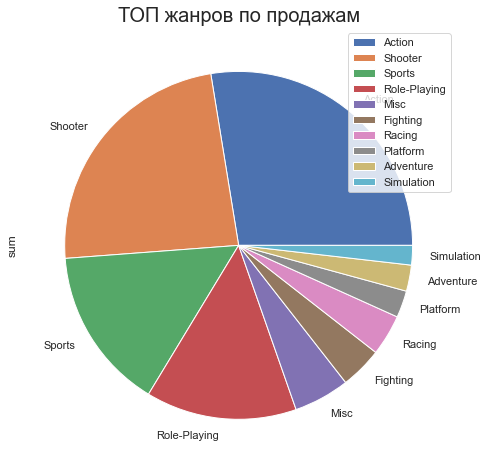

In [50]:
#сделаем срез по топ1- жанрам
top_genre = top_genre[0:10]
#построим круговую диаграмму, зададим параметры 
top_genre.plot(y='sum', kind='pie', figsize=(8,8))
plt.title("ТОП жанров по продажам", fontsize=20)
plt.show()

Итак, на диаграмме отлиично видно следующее:
1. Первую половину делят шутеры и экшен игры
2. Третью четверть спортивные и ролевые игры
3. А в четвертой четверти находятся все остальны игры

Построим диаграмму размаха для ТОП 5 жанров:

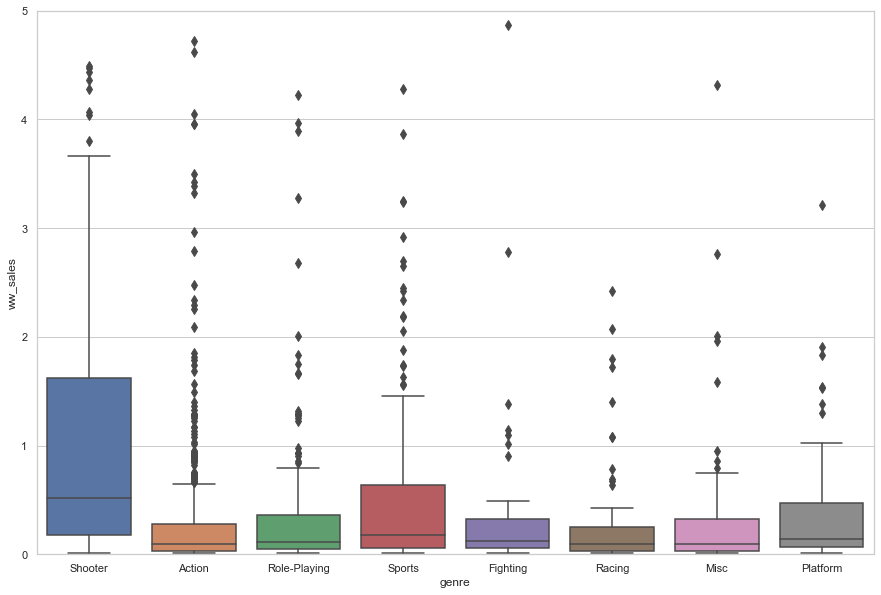

In [51]:
#построим "ящик с усами" для ТОП5 жанров
plt.figure(figsize=(15,10))
sns.boxplot(x="genre", y="ww_sales", data=act_games_df.query('genre not in("Puzzle", "Strategy", "Simulation", "Adventure")'), fliersize=7)
plt.ylim(0, 5)
plt.show()

На данной диаграмме наглядно видно, жанр экшен не смотря на большие продажи, нельзя назвать самым успешным, игры выпускается много, а медиана продаж продаж находится на одном из самых низких уровней, а нормальные значения дохода от продаж ниже 1 млн.
Наглядный пример успешного жанра - это шутеры, мединой примерно 0,4 млн и нормальными значениями до 3,8 млн. Опираясь на информаию с графиков, составим ТОП коммерчески успешных жанров:
1. Shooter
2. Sports
3. Platform
5. Role-Plying
6. Misc
7. Action
8. Fighting
9. Racing

**Выводы по разделу:**
1. Был опеределено начала роста игровой индустрии - 1995 год
2. Лучший год в игрвой индустрии - 2008, около тысячи уникальных игр
3. Были опредлены самые комерчески успешные платформы за всё время: PlayStation, Xbox, Wii, DC 
4. Был опередлен актуальный период для составления прогноза на будующий год. 2014 -2016 годы
5. За актуальный период прослеживается равномерное снжиения прибыли от продажи игр для всех платформ
5. Была опредлена самая потенциально успешная игровая платформа - PS4 из стационарых и WiiU из портативных
6. Зависимость продаж от отызвов критиков опредлена как положительная для всех платформ
7. Зависиомсть продаж от отзывово пользователей определена как полоижтельная для стационарых платформ и отствующая для всех остальных 
7. Определены самые коммерчески успешные жанры: шутеры, спортивные симуляторы и платформеры

## Составление портрета пользователя по регионам

У нас есть данные о продажах по 3 регионам:
* NA - North America - Северная Америка 
* EU - Europe - Европа
* JP - Japan - Япония

Составим портрет пользователя для кажого регона на основе ТОП набиолее популярных платформ и жанров:

### Определние топ-5 платформ для каждого регоина

Напишем функцию, которая будет выводить необходимы графики, возьмём ТОП5 платформ по продажам, а все оставшиеся объединим в группу "other":

In [63]:
#объявиф функцию для построения круговых диаграмм
#функция принимает значения параметра по которому групируем, значения по которым строимм, номер на оси y
#в теле функции словарь для подставления заголвков
#разделение данных на ТОП5 и все остальные с помошью среза
#построение графика и его параметры

def pie_plots(group_by, region, ax):
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'} 
    group = act_games_df.groupby([group_by]).sum().sort_values(by=region, ascending=False)
    other = group[5:].sum(axis=0)
    final_group = group[:5]
    final_group.loc['Other',:] = other
    final_group.plot(kind='pie', y=region, 
                     ax=axes[ax], autopct='%1.1f%%',
                     legend=False, title = title_dict[region],
                     ylabel=' ')

Выведем полученные диаграммы:

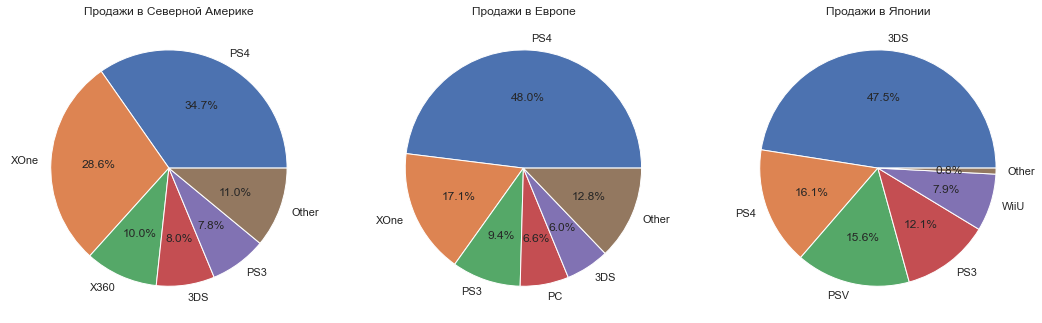

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18,8)) 
pie_plots('platform', 'na_sales', 0) 
pie_plots('platform', 'eu_sales', 1) 
pie_plots('platform', 'jp_sales', 2) 

На диаграммах видим следующее:
* самые популярные платформы в Европе и Северной Америке похожи, в обоих случаях - это домашнии консоли от Playatation o Xbox, суммарно они приносят практически 75% прибыли в этих регионах, самая прибыльная из них PS4 - 35% для США и 38% для Европейпы
* портативные приставки на европейском и американских рынках не актульны, самая поулярная из них 3DS имеет прибыль от 6 до 8 процентов для этих регинов
* для Японии ситуация прямо противополная, здесь практически треть прибыли у портативных приставок, самая поулярная из которых 3DS - 48%, дальше идут PSC(16%), WiiU(12%) 
* практически вся оставшаясь часть прибыли у PS двух последних поколений
* платформа Xbox не поулярна в Японии совсем
* все остальные платформы составляют крошечную часть прибыли в 1%

### Определние топ-5 жанров для каждого регоина

Применим старую функцию для составления диаграмм:

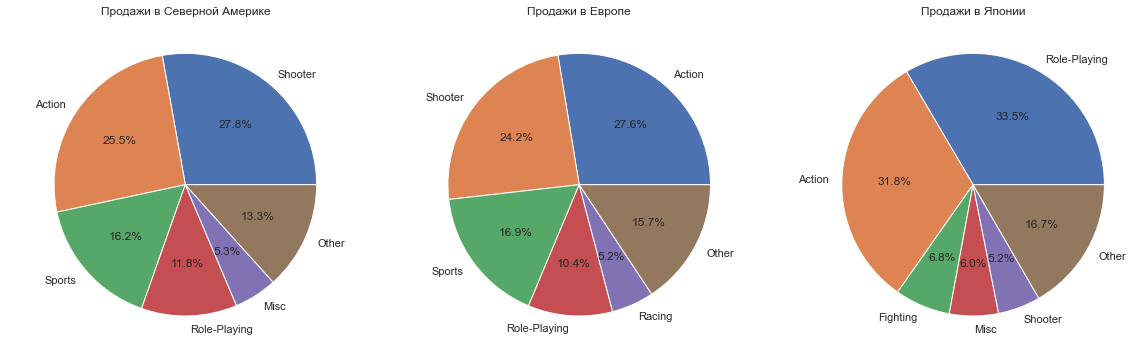

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20,10)) 
pie_plots('genre', 'na_sales', 0) 
pie_plots('genre', 'eu_sales', 1) 
pie_plots('genre', 'jp_sales', 2) 

Для жанров просеживается закономерности для всех 3 регинов, но и некоторые отличая также имеются:
* везде поулярны экшен игры: они состаляют примерно четвёртую часть всех продаж для кажого региона
* в Северной Америке и Европе 2ю четверть занимают шутеры, а в Японии жанр РПГ(33%) 
* для американского и европейского рынков рпг составаляют 12 и 10 % соответсвенно 
* у спортивных симулятаров в Европе и Америке относительное не плохие продажи, 16-17% от всех, а в Японии они совсем не популярны 
* оставшееся, выделяющиеся жанры для Америки миск - около 5%, для Европы гонки - около 5%, для Японии миск и файтинг 6 -7 % соотвественно 

### Влияение рейтинга ESRB на продажи в отдельном регионе

В ESRB рейтинги буквы означают сокращения и возрастные ограничения, например:
* EC - «EC» («Early childhood») — «Для детей младшего возраста». До 3х лет
* «E» («Everyone») — «Для всех»
* и т.д 

Для начал посмотрим какие значения рейтинга содержаться в данных за актуальный период:

In [55]:
#выведем уникальные значения для рейтинга
act_games_df['rating'].unique()

array(['NOT ESRB', 'M', 'E', 'T', 'E10+'], dtype=object)

Добавим ключи к словарю согалсно [источнику](https://dic.academic.ru/dic.nsf/ruwiki/140779 "academic.ru") из интернета 

In [56]:
#занесем соответсвия в словарь
esrb_dict = {'M': 'от 17 лет',
            'NOT ESRB': 'нет ESRB рейтинга',
            'E': 'для всех',
            'E10+': 'от 10 лет',
            'T': 'от 13 лет',}
# добавим в таблицу 
act_games_df['age_limit'] = act_games_df['rating'].map(esrb_dict)

Построим график с помощью ранее написанной функции:

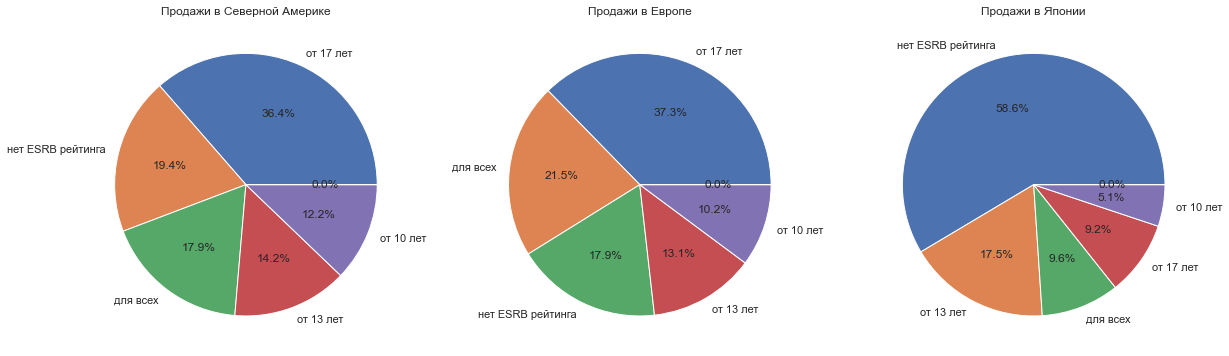

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(20,10)) 
pie_plots('age_limit', 'na_sales', 0) 
pie_plots('age_limit', 'eu_sales', 1) 
pie_plots('age_limit', 'jp_sales', 2)  

На графиках видим следующее:
* в Японии большиснтво игр без ESRB, рейтинга, что говорит нам о том, что в этом регионе рынок продажи игры занят не северо-американскими компаниями
* Европа с Америкой как и в предыдущих сравнениях имеют также много схожего, в обоих случаях популярнее всего игры с отметкой от 17 лет
* в Семерной Америке и Европе также приствуют игры без ESRB рейтнга, что говорит нам о том, что опредленная часть игр производится не в американских компаниях

**Выводы по разделу:**

Изучив процент продаж по категориям убедлись в том, что для кажого регоина есть свои особенности и предпочтения.
Портреты пользователей северо-американского рынка и европейского во-многом схожи, но всё же есть некоторые ньюансы и отличия которые стоит учесть при составлении плана на будующее развитие в продажи видео игр. Японский рынок довольно спецфичен и во много координально отличается от всех регионов. Занесём в таблицу паспорта пользователя основные отличия:

| Регоин        | Производитель |    Модель приставки | Тип приставки           | Предпочтительные жанры|Рейтинг в играх |
| ------------- | ------------- | --------------------| ----------------        |-----------------------|----------------|
| Северная Америка  | Sony/Miscrosoft  |   Playstation/XBox            |   стационарная/домашняя |  экшен/шутеры/cпорт         |от 17 лет      |     
| Европа            | Sony/Miscrosoft        |  Playstation/XBox      |   стационарная/домашняя |  экшен/шутеры/cпорт         |от 17 лет       |
| Япония            | Sony/Nintendo    |  DS/Wii/PSV       |   портативная           |  рпг/шутеры/файтинги           |не установлен*               |


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем нулевую и альетрнативную гипотезы:

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC различаются

**Коэффициент альфа:** 0.05 

Для проверки гипотез будем использовать двусторонний ти-тест Стюдента:


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [58]:
#создадим две переменные с оценками на Xbox One и PC
xone_score =  act_games_df.loc[(act_games_df['platform'] == 'XOne') & (act_games_df['user_score'] > -1), 'user_score']
pc_score = act_games_df.loc[(act_games_df['platform'] == 'PC') & (act_games_df['user_score'] > -1), 'user_score']
#вызовем метод results для проверки гипотезы
results = st.ttest_ind(
    xone_score, 
    pc_score,
    equal_var = False)
#задаим значение aplha
alpha = 0.05
#ведем значение pvalue
print(f'Значение p-value: {results.pvalue:}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Если не получилось отвергнуть нулевую гипотезу, то верно следующее утверждением "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", убедимся в этом и выедем среднии значения:

In [59]:
print(f'Средний пользовательский рейтинг у Xbox One: {xone_score.mean():.4f}')
print(f'Средний пользовательский рейтинг у PC: {pc_score.mean():.4f}')
print(f'Разница в средних значениях: {abs(pc_score.mean()-xone_score.mean()):.4f}')

Средний пользовательский рейтинг у Xbox One: 6.5945
Средний пользовательский рейтинг у PC: 6.2984
Разница в средних значениях: 0.2962


Видим, что средние значения действительно очень близки, соответственно уверенно принмаем нулевую гипотезу

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевую и альетрнативную гипотезы:

**Нулевая гипотеза:**  Средние пользовательские рейтинги жанров Sport и Action одинаковые

**Альтернативная гипотеза:**   Средние пользовательские рейтинги жанров Sport и Action разные

**Коэффициент альфа:** 0.05 

Как и в предыдущем тесте будем использовать использовать двусторонний ти-тест Стюдента:

In [60]:
#создадим две переменные с оценками для жанров Sports и Action
action_score =  act_games_df.loc[(act_games_df['genre'] == 'Action') & (act_games_df['user_score'] > -1), 'user_score'] 
sport_score =  act_games_df.loc[(act_games_df['genre'] == 'Sports') & (act_games_df['user_score'] > -1), 'user_score'] 
#вызовем метод results для проверки гипотезы
results = st.ttest_ind(
    action_score, 
    sport_score,
    equal_var = False)
#задаим значение aplha
alpha = 0.05
#ведем значение pvalue
print(f'Значение p-value: {results.pvalue:}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Если не получилось отвергнуть нулевую гипотезу, то верно следующее утверждение: "Средние пользовательские рейтинги жанров Sports и Action различаются", посмотрим как:

In [61]:
print(f'Средний пользовательский рейтинг у жанра Action: {action_score.mean():.4f}')
print(f'Средний пользовательский рейтинг у Sports: {sport_score.mean():.4f}')
print(f'Разница в средних значениях: {abs(action_score.mean()-sport_score.mean()):.4f}')

Средний пользовательский рейтинг у жанра Action: 6.7606
Средний пользовательский рейтинг у Sports: 5.2252
Разница в средних значениях: 1.5354


Различия в 1,5 раза, для деситебальной системы оценок, это достаточно много, посмотрим на стандартное оклонение

In [62]:
print(f' Стандартное оклонения для оценок пользователей в жанре Action: {np.std(action_score, ddof=1):.4f}')
print(f' Стандартное оклонения для оценок пользователей в жанре Sports: {np.std(sport_score, ddof=1):.4f}')

 Стандартное оклонения для оценок пользователей в жанре Action: 1.3779
 Стандартное оклонения для оценок пользователей в жанре Sports: 1.8566


Стандартные отклоения, разлчины в меньшей мере, соответственно, по статистке, нам чаще всего будут встречаться именно такие среднии значения. Поэтому в подверждение альтернативной гипотезе, можем дополнить, то что в жанре Action пользовательская оценка выше

**Вывод по разделу:**

Гипотезы сформулированы и проверены, подведём общий итог работы

## Итоги работы:

**Общее предстоавление об исходных данных и рекомендации:**  
В целом, большая часть данных содержит качественную информацию из которой можно составлять полезные выводы и делать качественные прогнозы:
* **дата релиза** - стоит добавить систему проверки даты релиза, т.к. для некоторых строк значения некорректны или вовсе отсутствуют
* **оценки критиков и пользователей** - стоит проработать систему присовения оценок, большая часть отсутвующих данных лишает нас важной информации 
* **рейтинг** - стоит добавить рейтинги играм, которые были произведены не только в США или Канаде, например, в России есть своя система(РСРВ), также как и в других странах, так можно будет составить более широкое предствление о том какие игры популярны по возростным категориям

В результате все пропуски были обработанные и таблице приведена к виду пригодному для текущего или дальнейших исследований

**Общие наблюдения по исследовательскому анализу данных:**

В результате исследования установили, что игровая индустрия начала свой стремительный рост в 1985 году и достигла пика в 2008м - в этот год было выпущено практически тысяча уникальных игр, сейчас она переживает период спада, это связано с тем, что рынок стал перенсыщен различного рода платформами и пользователей стало сложно удивить и предложить ему новый продукт за которой он готов будет платить деньги, поэтому важно опредлить зоны роста и работать над продуктами, которые смогут принести потенцально максимальную прибыль

Для получения максимальной прибыли, стоит в первую очередь обратится к клиентоориентированности, т.к. в ходе исследовательского анализа данных выяснили, что предпочтения в платформах, жанрах и возрастным категориям отличаются в зависимости от регоина. В таблице ниже есть основные данные которые составляют паспорт позьзователя и помогут опредлится с дальнейшем развитем: 

| Регоин        | Производитель |    Модель приставки | Тип приставки           | Предпочтительные жанры|Рейтинг в играх |
| ------------- | ------------- | --------------------| ----------------        |-----------------------|----------------|
| Северная Америка  | Sony/Miscrosoft  |   Playstation/XBox            |   стационарная/домашняя |  экшен/шутеры/cпорт         |от 17 лет      |     
| Европа            | Sony/Miscrosoft        |  Playstation/XBox      |   стационарная/домашняя |  экшен/шутеры/cпорт         |от 17 лет       |
| Япония            | Sony/Nintendo    |  DS/Wii/PSV       |   портативная           |  рпг/шутеры/файтинги           |не установлен*               |

**Максимально большой потенцал для получения прибыли:** 

**Платформы:**
* из стационарых платфром - PlayStation, она уже имеет очень хорошие продажи и имеет большой потенцал к росту
* из портативных WiiU - еще не раскралы весь, потенцал, но в будующем должна будет обогнать конкуретнов из своего сегмента

**Жанры в играх:**
* шутеры - безговорочный лидер по продажам и популярен во всех регионах
* платформеры - жанр, с хорошими текущими продажами, но ещё не успевший набрать должную популярность
* спортивные симуляторы - популярный жанр в Европе и США, со стабильно высокоими продажами, что, точно не можест оставить без прибыли

**Оценки от пользователей и кртиков:**

* всегда стоит обращать внимание на оценки критиков к игре, как правило хорошая оценка, залог хорошей прибыли у игры
* к оценкам пользователей стоит относится настороженно, не всегда низкая оценка от пользователя обернется провалом в продажах, скорее всего она к продажам не будет иметь никакого отношения

**Глобальная оценка игровой индустрии:**

На игровом рынке образовалась монополия, где 3 крупные компании соревнуются в прибыльности по регионам, а новая платформа, это новой поколение уже полюбившейся всем приставки. Один из путей развития это создание принципильно нового продукта или более активное внедрение старого в новые регионы: так для американцев и европейцев можно предложить портативные консоли, а для японцев домашнии приставки. Не менее важным направлением будет развитие системы оценок критиков и пользователей - она поможет повысить продажи и более детально взглянуть на прибыльности по жанрам, платформ и регионам. В целом, игровая индустрия похоже совершает новый цикл, рост которой нам еще предстоит увидеть через несколько лет.